# 推測統計

## Section 7 推測統計入門

### 標本分布

- 標本の中身は確率的に変動する
- 標本統計量も確率的に変動する値（確率変数）である
- 標本統計量が従う確率分布を標本分布と呼ぶ。

### 標本平均
- 標本から取得した平均を標本平均という
- 標本平均をどの程度の確率で得られるのかは、「平均の標本分布」に従う。
  - 標本分布は、理論上の分布
  - 「平均の標本分布」（母集団からどのくらいの確率で、その標本平均が得られるのか）であって、「ある標本の中の分布」ではない。
  
### 推定量(Estimator)

|母数|推定量||
|---|-----|----|
|母平均値$\mu$|標本平均値 $\bar{x}$|不偏推定量|
|母比率$\pi$|標本比率$p$|不偏推定量|
|母相関係数$p$|標本相関係数$r$||
|母分散$\sigma^2$|**不偏分散 $s^{'2}$**|不偏推定量|
|母標準偏差$\sigma$|**不偏分散の平方根 $s^{'}$**||

標本分散や標本標準偏差は、母分散や母標準偏差の推定量には使えない（不偏性がないため）

### 不偏性(unbiasedness)
- 推定量が平均的に母数と一致する場合、その推定量は「不偏性がある」
- 大量の標本をとって標本平均を計算したら、その標本平均の平均は母平均

### 平均の標本分布について
- 母集団から n個の標本を無限回取得した場合、
  - 「平均の標本分布の平均」は、母平均と同じ $\mu$ になる
  - 「平均の標本分布の分散」は、母分散を n で割った値 $\frac{\sigma^2}{n}$

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip']/df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [11]:
m = 100
n = 50
column = 'tip'
sample_means = []
sample_vars = []
for i in range(100):
    x = df.sample(n)[column]
    sample_means.append(x.mean())

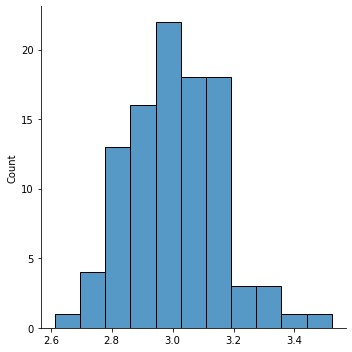

In [12]:
sns.displot(sample_means)

In [15]:
# 標本平均の平均
np.mean(sample_means)

3.008144

In [14]:
# 母平均
df[column].mean()

2.9982786885245902

In [16]:
# 標本平均の分散
np.var(sample_means)

0.023131109664000008

In [18]:
# 母分散/n ← 外れ値の影響が出る
np.var(df[column])/n

0.03813217024993285

### 不偏分散 (unbiased variance)

- 母分散の不偏推定量
- $s^{'2}= \frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2$
  - 不偏分散の標本分布の平均は、母分散（$\sigma^2$）に一致する
- 標本平均を使って分散を計算すると、母平均を使う場合よりも値が小さくなってしまうため、分散を過小評価してしまう。
- これに対して、n/(n-1)をかけることで補正している

### 不偏分散の平方根の普遍性

- 不偏分散の平方根は、推定量としては使える。が、不偏性はない。
- 不偏分散の平方根を不偏標準偏差と呼ぶのは間違い。あくまでも「不偏分散の平方根」
- $s'= \sqrt{\frac{1}{n-1}\sum_{i=1}^n(x_i-\bar{x})^2}$

In [20]:
## delta degree of freedum (ddof: 自由度)

# 不偏分散
# stats.tvar(a)
# np.var(a, ddof=1)

# 不偏分散の平方根
# stats.tstd(a)
# np.std(a, ddof=1)

In [21]:
stats.tvar(df['tip'])

1.914454638062471

In [22]:
np.var(df['tip'], ddof=1)

1.9144546380624725

In [23]:
np.sqrt(stats.tvar(df['tip']))

1.3836381890011822

In [24]:
stats.tstd(df['tip'])

1.3836381890011822

In [25]:
np.std(df['tip'], ddof=1)

1.3836381890011826

In [67]:
m = 1000
n = 100
column = 'tip'
sample_vars = []
sample_unbiased_vars = []
for i in range(m):
    x = df.sample(n)[column]
    sample_vars.append(np.var(x))
    sample_unbiased_vars.append(stats.tvar(x))

In [68]:
# 標本の分散の平均
np.mean(sample_vars)

1.8777315170900002

In [69]:
# 標本の不偏分散の平均
np.mean(sample_unbiased_vars)

1.8966985021111111

In [70]:
# 母集団の分散 (母分散)
np.var(df['tip'])

1.9066085124966428

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

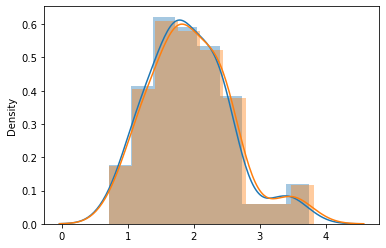

In [48]:
sns.distplot(sample_vars, label="Vars")
sns.distplot(sample_unbiased_vars, label="Unbiased Vars")

## Section 8 区間推定

- 点推定
- 区間推定
  - 母数の値を区間を持って推定する
    - 95%の確度で母比率は0.5-0.7である
    - この区間を信頼区間(CI: confidence interval)という (e.g.95%信頼区間で母比率は0.5-0.7である）
  - 95%信頼区間とは、100回に5回は間違える、という意味。「95%の確率で母数がこの区間にある」というのは厳密には間違い。真の母数は必ず１つ決まっているため

### どうやって区間推定するか

- 標本分布 (e.g. 当選確率60%)は、どの程度の確率でいえるか
- 比率の標本分布は二項分布から考えることができる
- 「標本の支持者の数」の標本分布は、二項分布になる
  - 二項分布はnが十分に大きいとき、正規分布に近似できる



### 比率の標本分布

内閣支持率を調査する。

- 支持者xの標本分布(二項分布に従う)の平均は=npの時、標準偏差=$\sqrt{npq}$
- 支持率 $\frac{x}{n}$の標本分布は、nが十分大きければ)比率の標本分布は平均p, 分散 $\frac{pq}{n}$ の正規分布になる


#### 比率の区間推定まとめ

1. 標本を無作為抽出する
2. 標本から推定量（標本比率)を計算する
3. 信頼区間を設定する
4. 推定量の標本分布を求める
5. 信頼区間の値を標本分布から算出。e.g. 95%信頼区間(-1.97 - +1.96)になる値を求める

In [80]:
# 支持者の数の標本分布が、二項分布になる（比率ではなく）
# 母集団から1000人を無作為抽出して、標本比率が0.6(60%)になるのは、95%の信頼区間でどの程度か
# 1000人中、570から630: よって57%から63%

alpha = 0.95
n = 1000,
p = 0.6

stats.binom.interval(alpha, n, p)

(array([570.]), array([630.]))

In [78]:
alpha = 0.99
n = 1000,
p = 0.6

stats.binom.interval(alpha, n, p)

(array([560.]), array([640.]))

In [82]:
# データセットを母集団と見立てて、50個の標本比率から母比率を区間推定する
# 男女比の推定、100回比率の推定を行う


alpha = 0.95
n = 50

female_rates = []
rates = []
for i in range(100):
    x = df.sample(n)
    female_rate = len(x[x['sex']=='Female'])/len(x)
    female_rates.append(female_rate)
    r = stats.binom.interval(alpha, n, female_rate)
    rates.append(r)


In [85]:
# 母比率
len(df[df['sex']=='Female'])/len(df)

0.35655737704918034

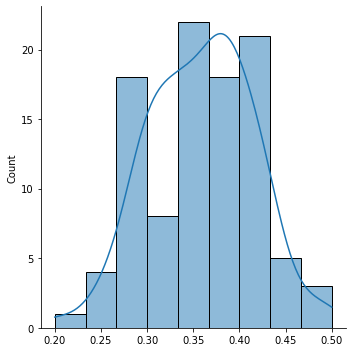

In [88]:
sns.displot(female_rates, kde=True)

In [109]:
# 回答
alpha = 0.95
n = 50
m = 100

# 母比率
population_female_ratio = len(df[df['sex']=='Female'])/len(df)
print(population_female_ratio)

results = []

for _ in range(m):
    sample_df = df.sample(50)
    female_ratio = len(sample_df[sample_df['sex']=='Female'])/len(sample_df)
    
    # 女性の数の区間
    min_num, max_num = stats.binom.interval(alpha, n=n, p=female_ratio)
    
    # Ratioに変換
    min_ratio = min_num / n
    max_ratio = max_num / n
    # 母比率がmin_ratio, max_ratioの間に入っているかどうか
    correct = min_ratio < population_female_ratio < max_ratio
    results.append({'min': min_ratio, 'max': max_ratio, 'correct': correct})

0.35655737704918034


In [110]:
result_df = pd.DataFrame(results)
result_df['correct'].value_counts()

True     98
False     2
Name: correct, dtype: int64

### 平均値の区間推定

- 平均の標本分布の平均は母平均と同じ $\mu$ になる
- 平均の標本分布の分散は母分散を n で割った値 ($\frac{\sigma^2}{n}$)
- 平均の標本分布は、正規分布になるとは限らない
  - 母集団が正規分布に従う場合、平均の標本分布も正規分布になる
  - 母集団が正規分布でない場合
    - 十分に大きい母集団から標本(例えば100世帯の世帯年収)を無限回、取得した場合、平均の標本分布は正規分布に近似できる
    
### 標本分布の標準化

$$
z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}
$$

$$
-1.96 < \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}} < 1.96
$$

$\sigma$ を 不偏分散 $s^{'2}$ の平方根 $s^{'}$ で代用する


$$
-1.96 < \frac{\bar{x} - \mu}{\frac{s^{'}}{\sqrt{n}}} < 1.96
$$

母標準偏差 $\sigma$ の代わりに$s^{'}$ で代用で代用したことで、標準正規分布は少し形が変形する。
しかし、標本サイズが大きい場合、標準正規分布に近似可能

$$
\bar{x} - 1.96 \frac{s'}{\sqrt{n}} < \mu < \bar{x} + 1.96 \frac{s'}{\sqrt{n}}
$$

In [119]:
alpha = 0.95
population_mean = df['tip'].mean()
print(population_mean)
n = 50
m = 100

results = []

for _ in range(m):
    x = df.sample(50)['tip']
    sample_mean = x.mean()
    sample_var = stats.tvar(x)
    # scaleには本来は母集団の標準偏差を入れたいが、わからないため、不偏分散の平方根を入れる
    min_val, max_val = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
    correct = min_val < population_mean < max_val
    results.append({'min': min_val, 'max': max_val, 'correct': correct})

2.9982786885245902


In [120]:
result_df = pd.DataFrame(results)
result_df['correct'].value_counts()

True     97
False     3
Name: correct, dtype: int64

### t分布

- 母標準偏差 $\sigma$ の代わりに不偏分散 $s^{'2}$の平方根 s^{'}を代用することで変形した分布。
- t分布では95%信頼区間が-1.96 - 1.96にならない　（自由度2の場合、-4.30 〜 4.30）
- 自由度(degree of freedom)n-1 パラメータをとる
- 標準正規分布に比べ、裾野が広くなる。
  - 同じ信頼区間で、とりうる区間が広くなる（推定が曖昧になる）
- nを大きくすると、標準正規分布に近づく(nが十分に大きければ、標準正規分布に近似可能）
  - nが大きくなると、裾野が狭くなり、区間推定も狭くなる

$$
t = \frac{\bar{x}-\mu}{\frac{s^{'}}{\sqrt{n}}}
$$

In [123]:
## t分布
# stats.t(df) # dfはdegree of freedom

# 自由度1のt分布から1つ値を得る
stats.t(1).rvs()

0.8708566440032918

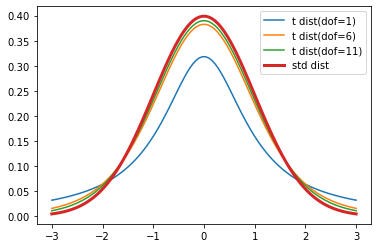

In [127]:
x = np.linspace(-3,3,100)

# 正規分布
z = stats.norm.pdf(x)

# 自由度1, 6, 11のt分布
for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x,t, label=f"t dist(dof={dof})")
plt.plot(x,z, label="std dist", linewidth=3)
plt.legend()

50個の標本平均から正規分布を使った母平均の区間推定と
t分布を使った母平均の区間推定で結果がどう異なるかを確認する
95%信頼区間とする

In [147]:
alpha = 0.95
population_mean = df['tip'].mean()
print(population_mean)
n = 50
m = 100

results = []

for _ in range(m):
    x = df.sample(50)['tip']
    sample_mean = x.mean()
    sample_var = stats.tvar(x)
    # 正規分布を使った母平均の区間推定
    # scaleには本来は母集団の標準偏差を入れたいが、わからないため、不偏分散の平方根を入れる
    min_val, max_val = stats.norm.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n))
    correct = min_val < population_mean < max_val
    
    # t分布を使った母平均の区間推定
    min_val_t, max_val_t = stats.t.interval(alpha, loc=sample_mean, scale=np.sqrt(sample_var/n), df=n-1)
    correct_t = min_val_t < population_mean < max_val_t
    
    results.append({'min': min_val, 'max': max_val, 'correct': correct,
                    'min_t': min_val_t, 'max_t': max_val_t, 'correct_t': correct_t})
    

2.9982786885245902


In [148]:
result_df = pd.DataFrame(results)
result_df['correct'].value_counts()

True     97
False     3
Name: correct, dtype: int64

In [149]:
result_df['correct_t'].value_counts()

True     98
False     2
Name: correct_t, dtype: int64

In [150]:
print(min_val, max_val)
print(min_val_t, max_val_t) # t分布の方が裾野が広い

2.4617880350735497 3.0746119649264516
2.4540320351167724 3.082367964883229


#### 平均の区間推定まとめ

1. 標本を無作為抽出する
2. 標本から推定量（標本平均)を計算する
3. 信頼区間を設定する
4. 推定量の標本分布を求める
5. 信頼区間の値を標本分布から算出。e.g. 自由度n-1のt分布における95%信頼区間(-1.98 - +1.98)になる値を求める